# Cloning Quasars

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

In [1]:
from astroML.datasets import fetch_dr7_quasar
import astropy
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy import random as rnd
import scipy.stats
from scipy.stats import norm
astropy.cosmology.Planck15
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

I download the data for the quasars and plot them into a histogram.

In [2]:
# Fetch the quasar data
data = fetch_dr7_quasar()

#I  select the first 10000 points
data = data[:10000]

z = data['redshift']

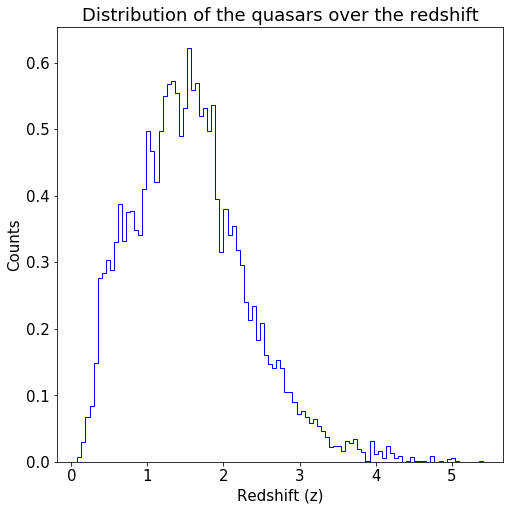

In [3]:
#plot an Histogram of the data
plt.hist(z, bins=100, density=True, histtype='step', color='b') 
plt.xlabel('Redshift (z)')
plt.ylabel('Counts')
plt.title('Distribution of the quasars over the redshift')
plt.show()

# Rejection sampling

The maximum value of z is: 0.6225033764724289


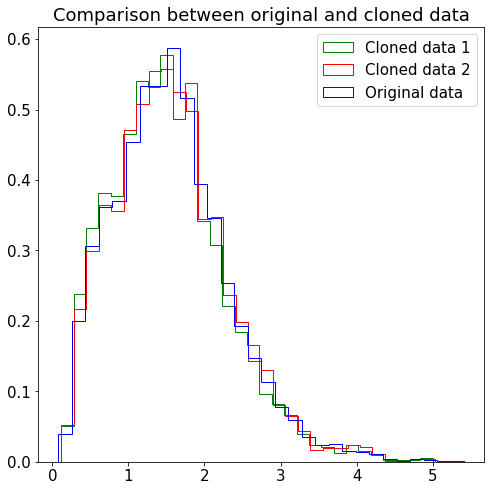

In [11]:
x, y = np.histogram(z, bins=100, density=True) #x and y are inverted
max_x = x.max()
print("The maximum value of z is:", max_x)

N = 10000 #I fixed a high number of trials
a = np.random.uniform(0, 8, N)
b = np.random.uniform(0, max_x, N)

#I make the histogram as a function
h = scipy.stats.rv_histogram((x, y)) 

masking = b <= h.pdf(a) #access all values when b <= h.pdf(a)

reject = a[masking] #rejects all values outside the masking

plt.hist(reject, bins=30, density= True, histtype='step', color='green', label='Cloned data 1') 
plt.hist(h.rvs(size=N), bins=30, density=True, histtype='step', color='red', label='Cloned data 2') 
plt.hist(z, bins=30, density=True, histtype='step', color='blue', label='Original data')
plt.legend(loc='upper right')
plt.title('Comparison between original and cloned data')
plt.show()

Higher is the value of the N trials, more similar are the cloned datas to the original dataset.

# Inverse Transform

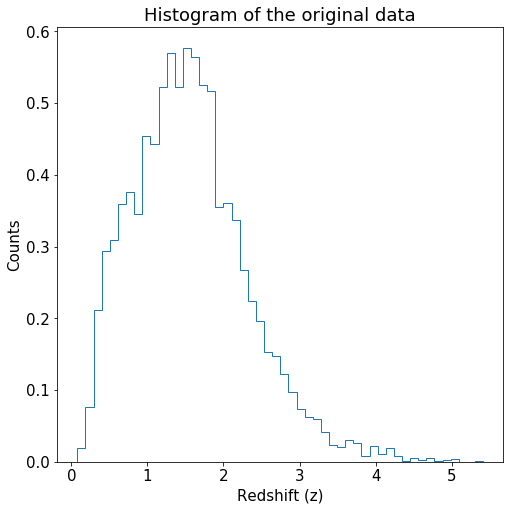

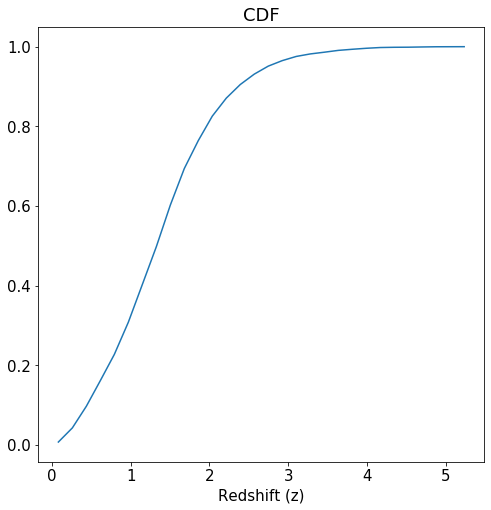

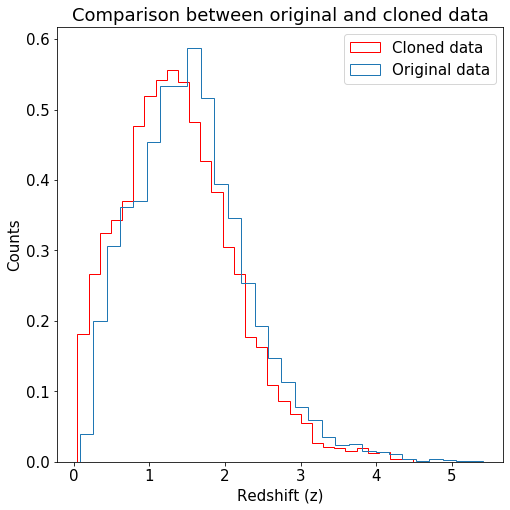

In [12]:
plt.hist(z, bins=50, density=True, histtype='step') #this is my original data plotted into a histogram

#I make a histogram object
bins = 30
y, x = np.histogram(z, bins=bins, density=True)
plt.xlabel('Redshift (z)')
plt.ylabel('Counts')
plt.title('Histogram of the original data')
plt.show()

#mid bins
asse_x = np.arange(min(z), max(z), (max(z)-min(z))/bins)

#cdf
cdf = np.cumsum(y)/np.sum(y)
plt.plot(asse_x, cdf) 
plt.title('CDF')
plt.xlabel('Redshift (z)')
plt.show()

#inverse of the cdf
inverse = scipy.interpolate.interp1d(cdf, asse_x, fill_value='extrapolate')

#now I generate a random sample
r = np.sort(rnd.uniform(0.001, 0.999, 10000))
sample = inverse(r)

plt.hist(sample, bins=bins, density=True, histtype='step', color='red', label='Cloned data')
plt.hist(z, bins=bins, density=True, histtype='step', label='Original data')
plt.legend(loc='upper right')
plt.xlabel('Redshift (z)')
plt.ylabel('Counts')
plt.title('Comparison between original and cloned data')
plt.show()

# Theoretical distribution of quasars

Now I compare the theoretical distribution of the quasars with the data obtained by SDSS catalogue, then I plot them.

In [13]:
import astropy
astropy.cosmology.Planck15

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

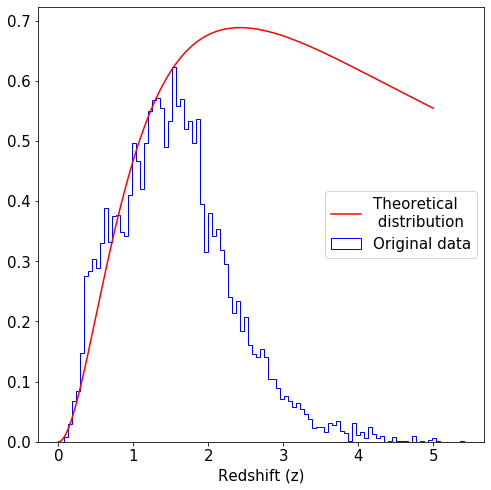

In [28]:
def quasar (z_value):
    return 4.*np.pi*astropy.cosmology.Planck18.differential_comoving_volume(z_value).value

x = np.linspace(0, 5, 10000)
plt.hist(z, bins=100, density=True, histtype='step', label='Original data', color='b')
plt.plot(x, 1.3*10**(-12)*quasar(x), color='r', label='Theoretical \n distribution')
plt.legend(loc='center right')
plt.xlabel('Redshift (z)')
plt.show()
